## IMPORT MODULE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('AIR QUALITY DATA.CSV')

In [4]:
print(df)

                City     Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad   1-1-15    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad   2-1-15    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad   3-1-15    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad   4-1-15    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad   5-1-15    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...      ...    ...    ...    ...    ...    ...    ...   
28489  Visakhapatnam  3-11-95  15.02  50.94   7.68  25.06  19.54  12.47   
28490  Visakhapatnam  4-11-95  24.38  74.09   3.42  26.06  16.53  11.99   
28491  Visakhapatnam  5-11-95  22.91  65.73   3.45  29.53  18.33  10.71   
28492  Visakhapatnam  6-11-95  16.64  49.97   4.05  29.26  18.80  10.03   
28493  Visakhapatnam  7-11-95  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  13

In [5]:
# To check how many null vales are there in the data
df.isnull().sum()

City              0
Date              0
PM2.5          3567
PM10          10106
NO             2551
NO2            2554
NOx            3360
NH3            9315
CO             1747
SO2            2822
O3             2999
Benzene        5149
Toluene        7564
Xylene        17611
AQI            3651
AQI_Bucket     3651
dtype: int64

In [6]:
# deleting rows all with any number of null value.
df=df.dropna()
print(df)

                City      Date  PM2.5    PM10    NO    NO2    NOx    NH3  \
2123       Amaravati  24-10-20  81.40  124.50  1.44  20.50  12.08  10.72   
2124       Amaravati  25-10-20  78.32  129.06  1.26  26.00  14.85  10.28   
2125       Amaravati  26-10-20  88.76  135.32  6.60  30.85  21.77  12.91   
2126       Amaravati  27-10-20  64.18  104.09  2.56  28.07  17.01  11.42   
2127       Amaravati  28-10-20  72.47  114.84  5.23  23.20  16.59  12.25   
...              ...       ...    ...     ...   ...    ...    ...    ...   
28488  Visakhapatnam   2-11-95   7.63   32.27  5.91  23.27  17.19  11.15   
28489  Visakhapatnam   3-11-95  15.02   50.94  7.68  25.06  19.54  12.47   
28490  Visakhapatnam   4-11-95  24.38   74.09  3.42  26.06  16.53  11.99   
28491  Visakhapatnam   5-11-95  22.91   65.73  3.45  29.53  18.33  10.71   
28492  Visakhapatnam   6-11-95  16.64   49.97  4.05  29.26  18.80  10.03   

         CO    SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
2123   0.12

#  Which city has the highest average PM2.5 levels?

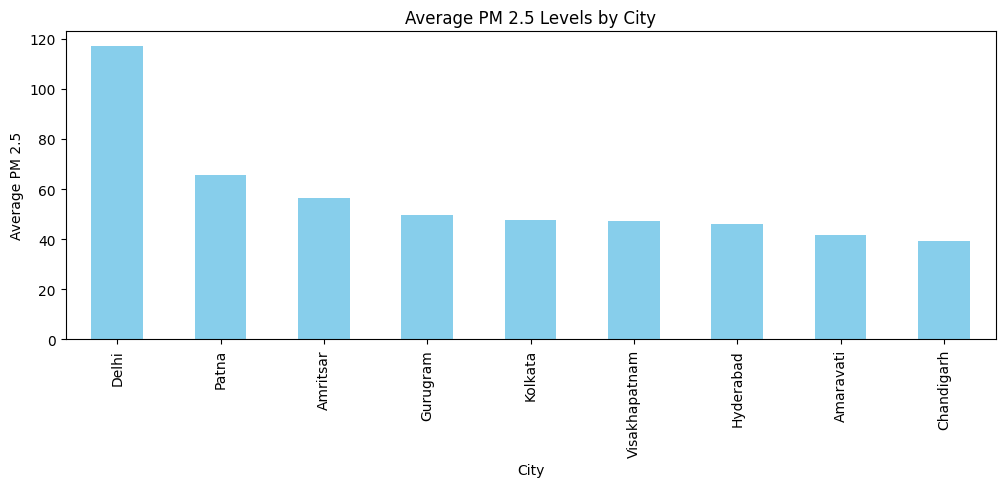

In [38]:
avg_pm25_by_city = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False)
avg_pm25_by_city.plot(kind='bar', figsize=(12,4), color='skyblue')
plt.title('Average PM 2.5 Levels by City')
plt.xlabel('City')
plt.ylabel('Average PM 2.5')
plt.show()

#  How do PM10 levels vary across cities?

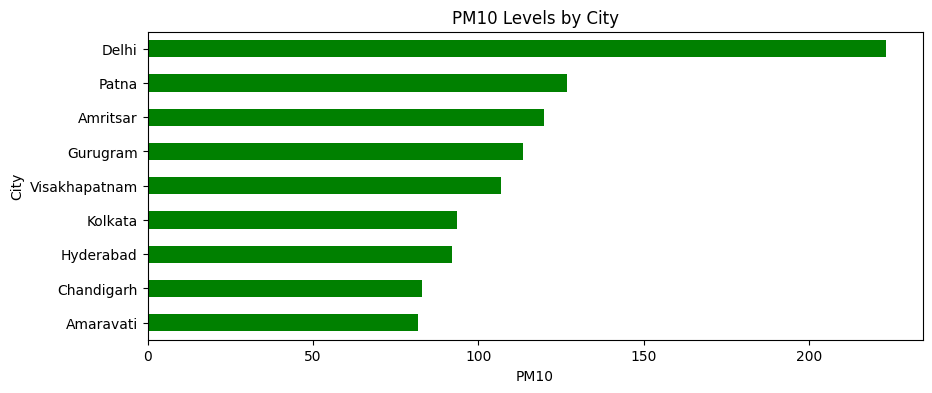

In [7]:
pm10_by_city = df.groupby('City')['PM10'].mean().sort_values()
pm10_by_city.plot(kind='barh', color='green', figsize=(10, 4))
plt.title('PM10 Levels by City')
plt.xlabel('PM10')
plt.ylabel('City')
plt.show()

#  What is the trend of AQI over time in Delhi ?

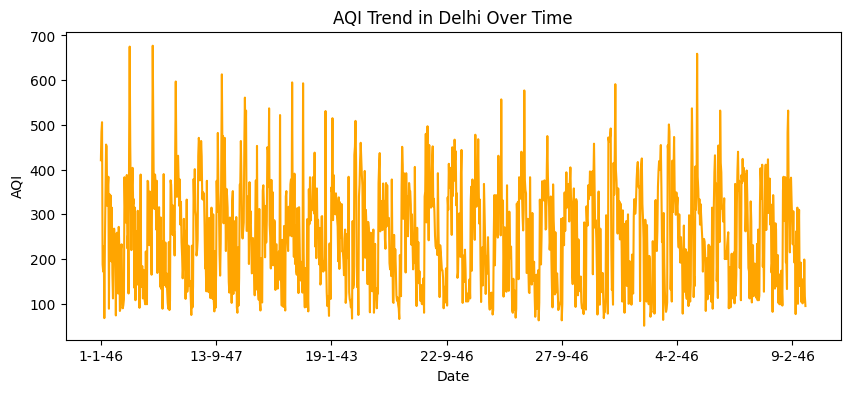

In [8]:
city_data = df[df['City'] == 'Delhi']
city_data.groupby('Date')['AQI'].mean().plot(figsize=(10, 4), color='orange')
plt.title('AQI Trend in Delhi Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

#  How does NOx concentration vary across different cities?

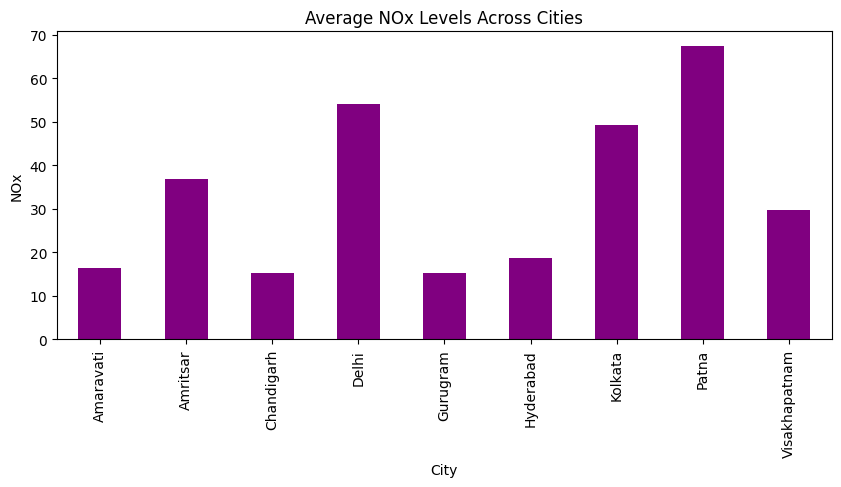

In [9]:
df.groupby('City')['NOx'].mean().plot(kind='bar', color='purple', figsize=(10, 4))
plt.title('Average NOx Levels Across Cities')
plt.xlabel('City')
plt.ylabel('NOx')
plt.show()

#  Which city had the cleanest air based on AQI (AQI Bucket: Good)?

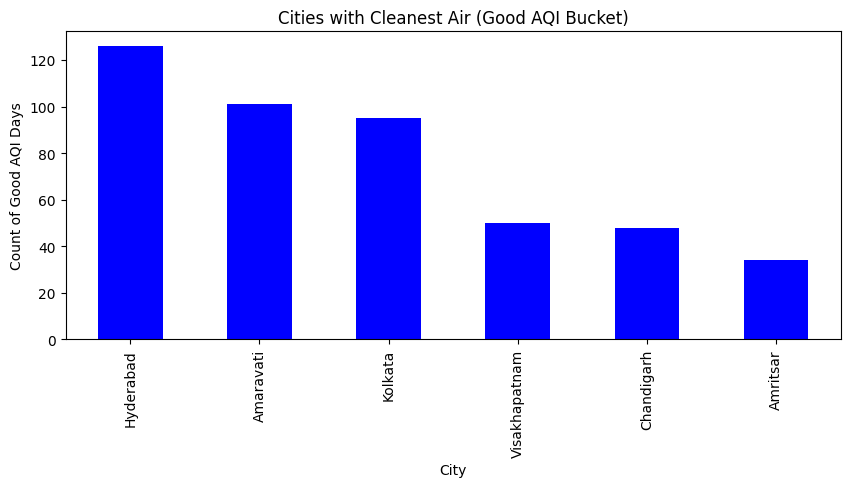

In [11]:
good_aqi_cities = df[df['AQI_Bucket'] == 'Good'].groupby('City').size().sort_values(ascending=False)
good_aqi_cities.plot(kind='bar', color='blue', figsize=(10, 4))
plt.title('Cities with Cleanest Air (Good AQI Bucket)')
plt.xlabel('City')
plt.ylabel('Count of Good AQI Days')
plt.show()

#  What are the top 5 cities with the highest average AQI?

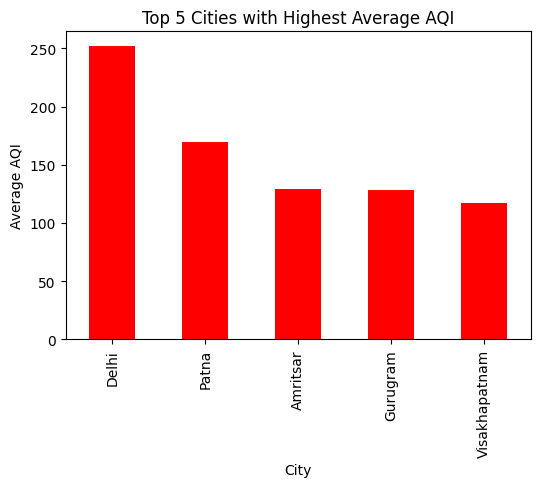

In [10]:
top_cities_aqi = df.groupby('City')['AQI'].mean().nlargest(5)
top_cities_aqi.plot(kind='bar', color='red', figsize=(6, 4))
plt.title('Top 5 Cities with Highest Average AQI')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()

# Compare the average AQI across cities in the "Very Poor" AQI Bucket.

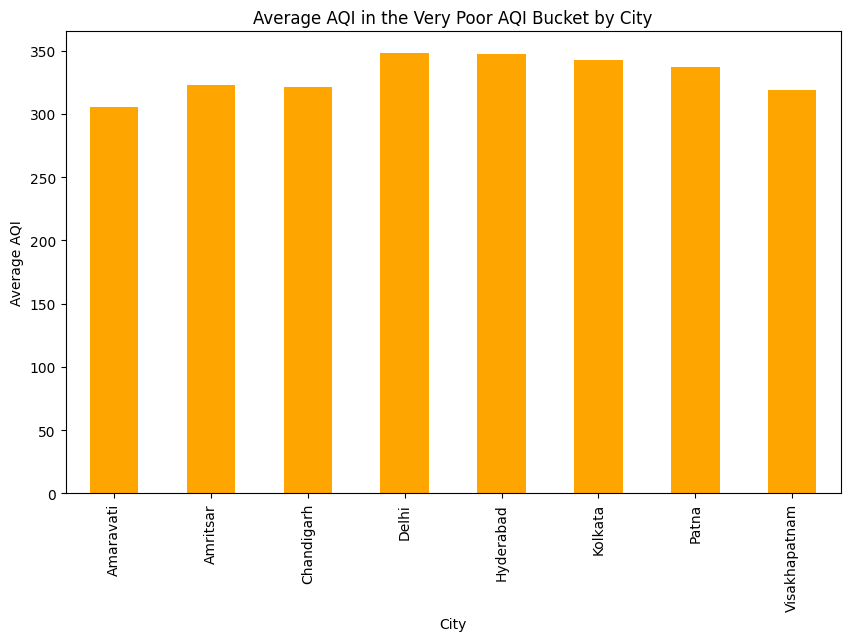

In [32]:
very_poor_aqi = df[df['AQI_Bucket'] == 'Very Poor'].groupby('City')['AQI'].mean()
very_poor_aqi.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average AQI in the Very Poor AQI Bucket by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()

# What is the total count of days when AQI was "Severe" across all cities?

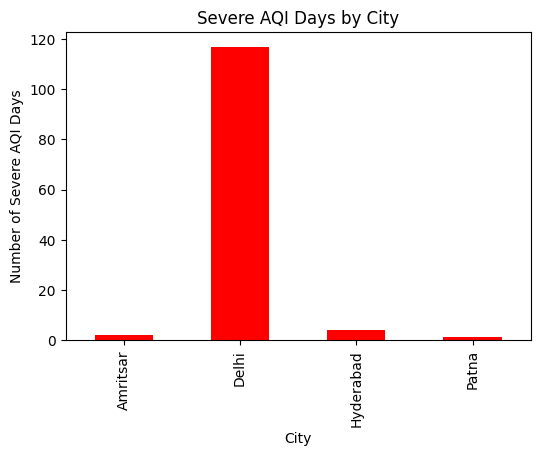

In [9]:
severe_aqi_days = df[df['AQI_Bucket'] == 'Severe'].groupby('City').size()
severe_aqi_days.plot(kind='bar', color='red', figsize=(6,4))
plt.title('Severe AQI Days by City')
plt.xlabel('City')
plt.ylabel('Number of Severe AQI Days')
plt.show()

#  How many days in each city recorded AQI in the "Very Poor" category?

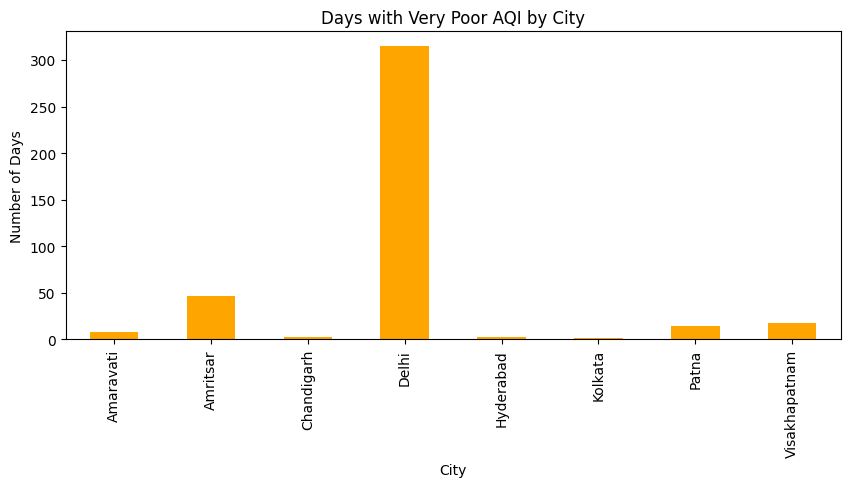

In [12]:
very_poor_days = df[df['AQI_Bucket'] == 'Very Poor'].groupby('City').size()
very_poor_days.plot(kind='bar', color='orange', figsize=(10, 4))
plt.title('Days with Very Poor AQI by City')
plt.xlabel('City')
plt.ylabel('Number of Days')
plt.show()

#  Compare PM2.5 levels across two major cities (e.g., Delhi vs Amaravati).

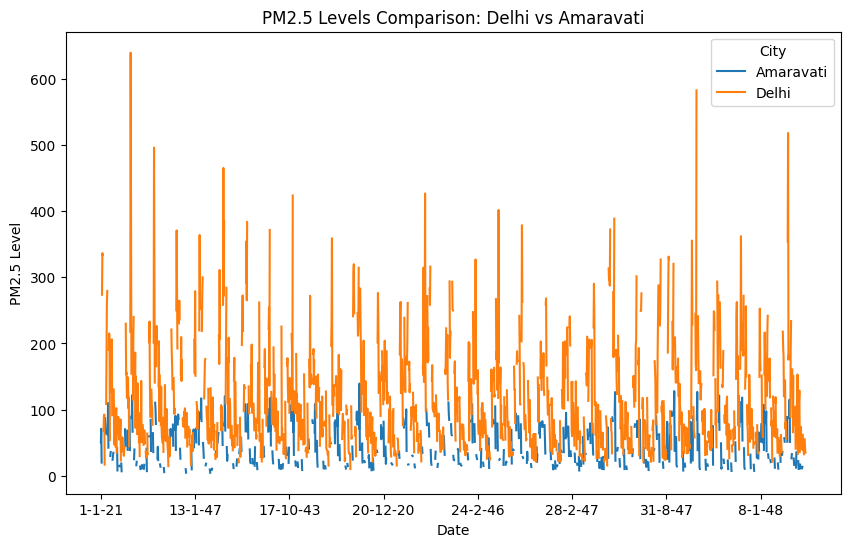

In [19]:
cities_data = df[df['City'].isin(['Delhi', 'Amaravati'])]
cities_data.groupby(['City', 'Date'])['PM2.5'].mean().unstack(0).plot(figsize=(10, 6))
plt.title('PM2.5 Levels Comparison: Delhi vs Amaravati')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.show()

#  What is the distribution of AQI across all cities?

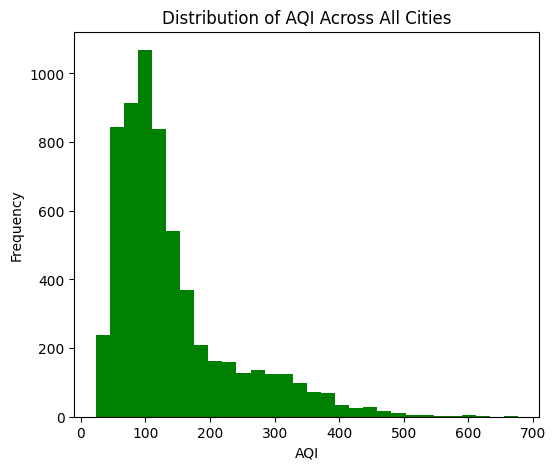

In [85]:
df['AQI'].plot(kind='hist', bins=30, color='green', figsize=(6, 5))
plt.title('Distribution of AQI Across All Cities')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

#  What is the minimum recorded SO2 concentration in each city?

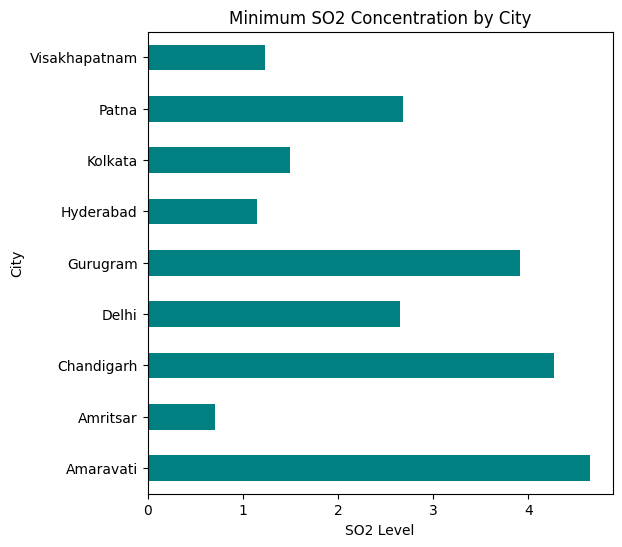

In [21]:
min_so2_by_city = df.groupby('City')['SO2'].min()
min_so2_by_city.plot(kind='barh', color='teal', figsize=(6, 6))
plt.title('Minimum SO2 Concentration by City')
plt.xlabel('SO2 Level')
plt.ylabel('City')
plt.show()

#  How many times did each city experience "Severe" AQI levels?

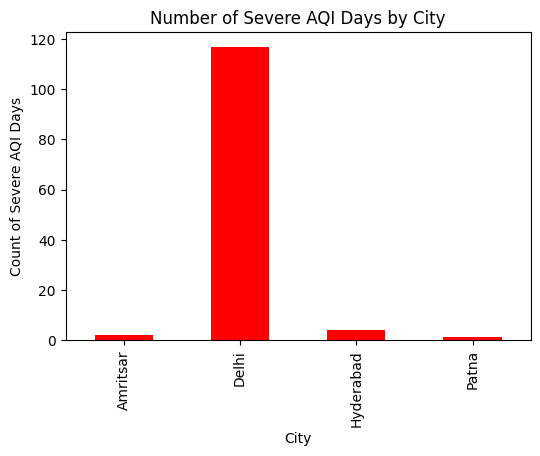

In [10]:
severe_aqi_count = df[df['AQI_Bucket'] == 'Severe'].groupby('City').size()
severe_aqi_count.plot(kind='bar', color='red', figsize=(6, 4))
plt.title('Number of Severe AQI Days by City')
plt.xlabel('City')
plt.ylabel('Count of Severe AQI Days')
plt.show()

#  Compare NO2 levels in two or more cities over time.

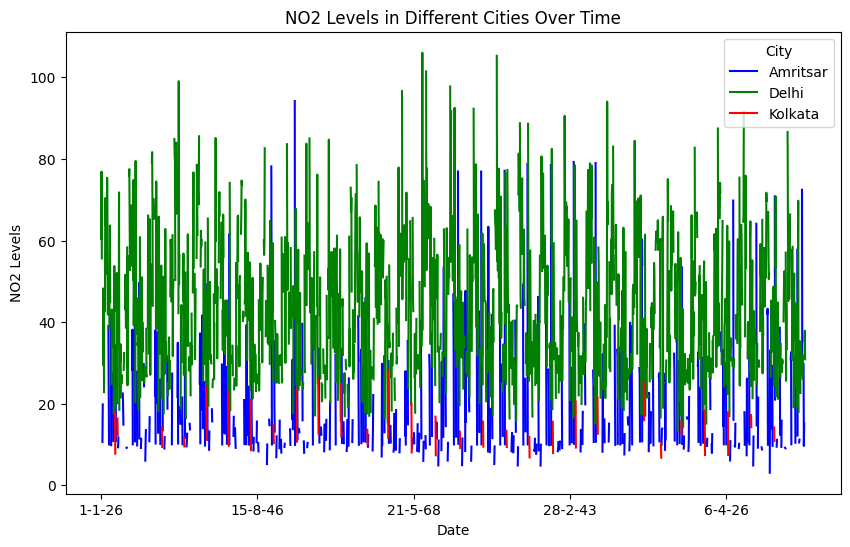

In [25]:
cities_data = df[df['City'].isin(['Delhi', 'Kolkata', 'Amritsar'])]
cities_data.groupby(['City', 'Date'])['NO2'].mean().unstack(0).plot(figsize=(10, 6),color=['blue','green','red'])
plt.title('NO2 Levels in Different Cities Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.show()

# What is the distribution of AQI across all cities?

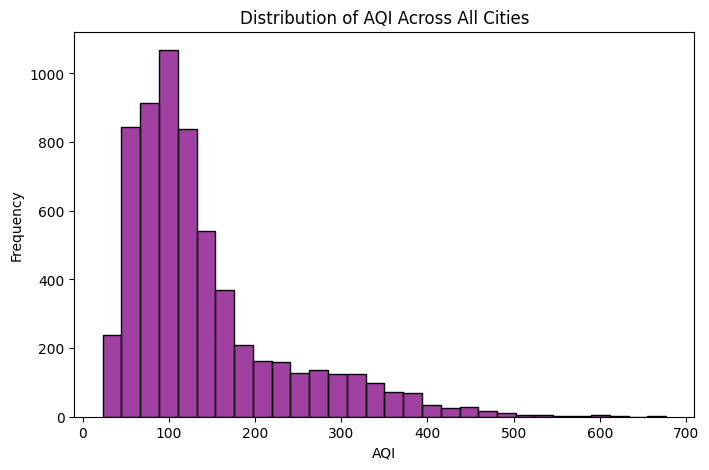

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AQI'], bins=30, color='purple')
plt.title('Distribution of AQI Across All Cities')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# What is the correlation between PM2.5 and AQI across all cities?

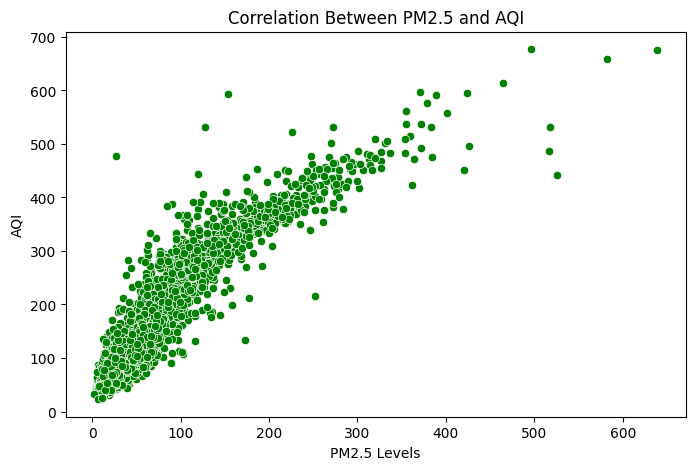

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PM2.5'], y=df['AQI'], color='green')
plt.title('Correlation Between PM2.5 and AQI')
plt.xlabel('PM2.5 Levels')
plt.ylabel('AQI')
plt.show()

# How does NH3 concentration vary between different cities?

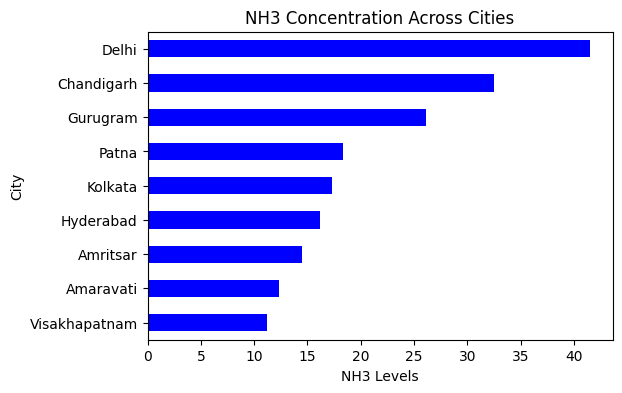

In [35]:
nh3_city = df.groupby('City')['NH3'].mean().sort_values()
nh3_city.plot(kind='barh', color='blue', figsize=(6,4))
plt.title('NH3 Concentration Across Cities')
plt.xlabel('NH3 Levels')
plt.ylabel('City')
plt.show()

# What is the trend of Ozone (O3) concentration across different months?

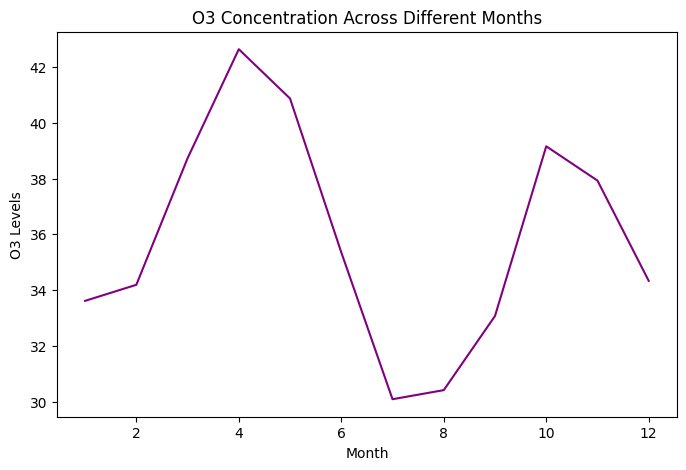

In [36]:
df.groupby('Month')['O3'].mean().plot(kind='line', color='purple', figsize=(8, 5))
plt.title('O3 Concentration Across Different Months')
plt.xlabel('Month')
plt.ylabel('O3 Levels')
plt.show()

# What is the average Xylene concentration in each city?

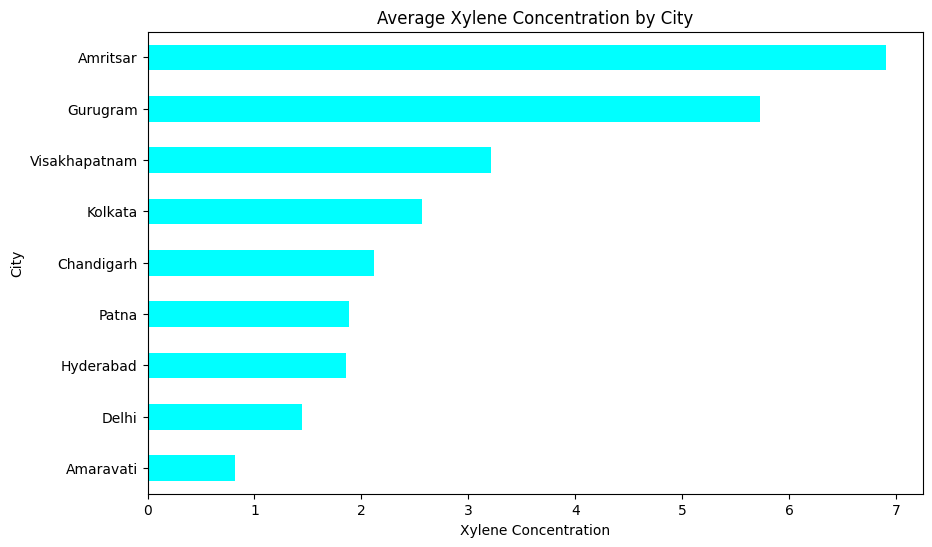

In [37]:
xylene_city = df.groupby('City')['Xylene'].mean().sort_values()
xylene_city.plot(kind='barh', color='cyan', figsize=(10, 6))
plt.title('Average Xylene Concentration by City')
plt.xlabel('Xylene Concentration')
plt.ylabel('City')
plt.show()

# Thank you